# Homework #3

#### 1. global_internet_users.csv 데이터 분석

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

df = pd.read_csv('global_internet_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB


In [2]:
sample_countries = ['United States', 'China', 'India', 'Germany', 'Brazil']
country_df = df.loc[df['Entity'].isin(sample_countries)]

##### - 셀룰러 가입자 대비 인터넷 사용자 비율 산점도 -

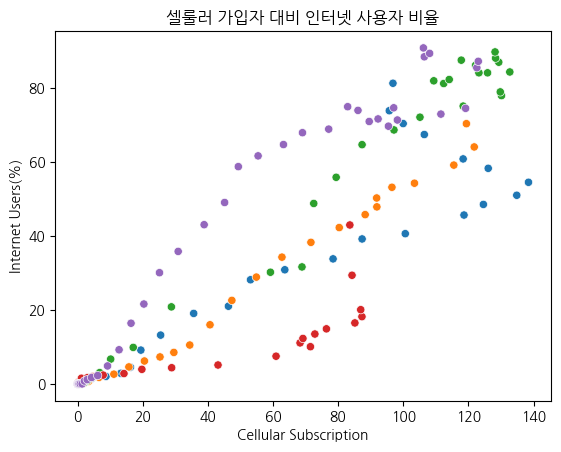

In [3]:
sns.scatterplot(data=country_df, x='Cellular Subscription', y='Internet Users(%)', hue='Entity', legend=False)
plt.title('셀룰러 가입자 대비 인터넷 사용자 비율')    # 범례 지우기 : legend=False
plt.show()

##### - 시간에 따른 인터넷 사용자 변화(연도별 트렌드 lineplot)

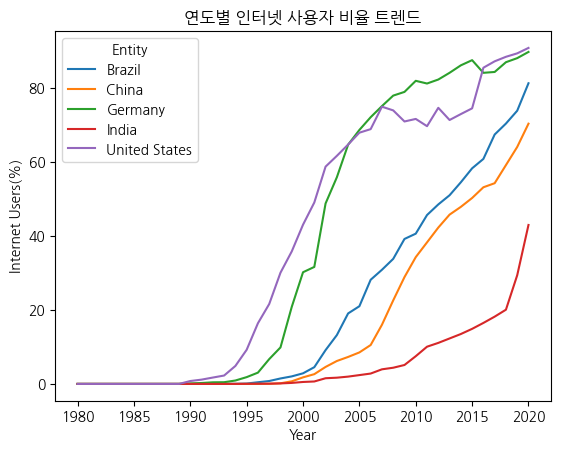

In [4]:
sns.lineplot(data=country_df, x='Year', y='Internet Users(%)', hue='Entity')
plt.title('연도별 인터넷 사용자 비율 트렌드')
plt.show()

##### - 상관관계 히트맵 -

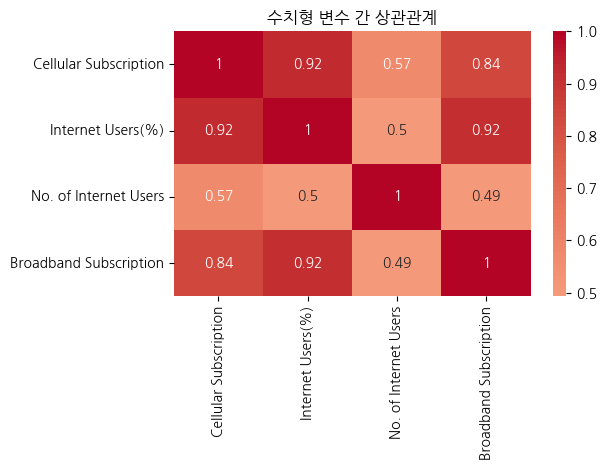

In [5]:
heats = country_df[['Cellular Subscription', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']]
corr = heats.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.show()

##### - 5개국의 인터넷 사용자 백분율 boxplot -

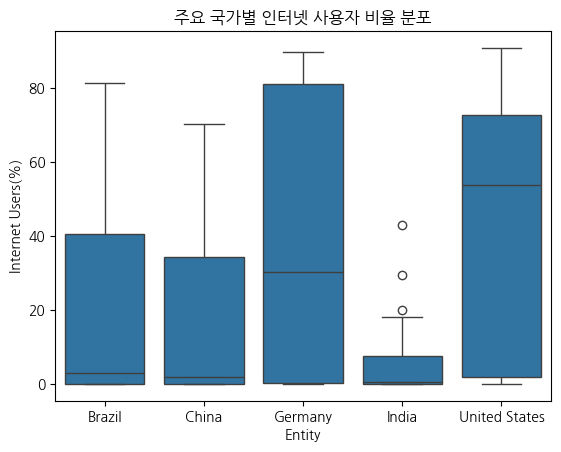

In [6]:
sns.boxplot(data=country_df, x='Entity', y='Internet Users(%)')
plt.title('주요 국가별 인터넷 사용자 비율 분포')
plt.show()

##### - 셀룰러 가입자와 인터넷 사용자(%)간 선형 회귀 : lmplot -

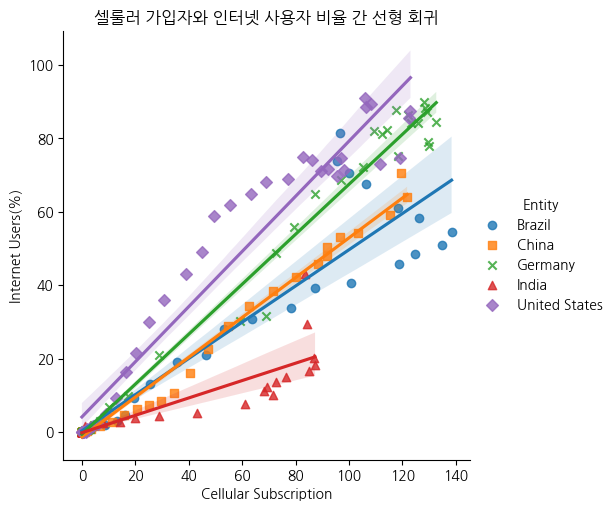

In [7]:
sns.lmplot(data=country_df, x='Cellular Subscription', y='Internet Users(%)', hue='Entity', markers=['o', 's', 'x', '^', 'D'])
plt.title('셀룰러 가입자와 인터넷 사용자 비율 간 선형 회귀')
plt.show()